<a href="https://colab.research.google.com/github/you-sif/you-sif/blob/main/K_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 640x480 with 0 Axes>

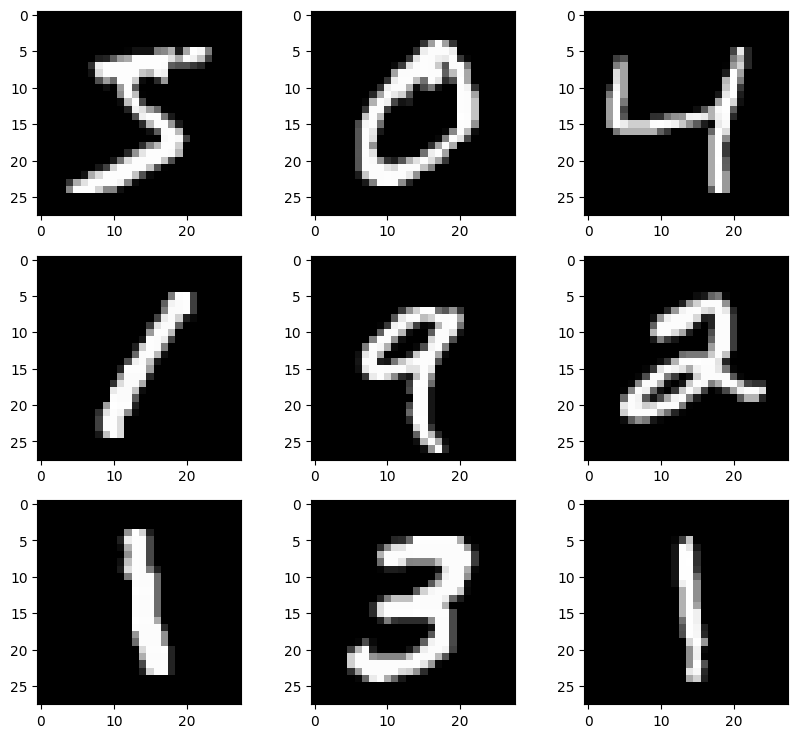

In [8]:
plt.gray()
plt.figure(figsize = (10,9))
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(x_train[i])

In [9]:
# Printing examples in 'y_train'for i in range(5):
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [10]:
print(x_train.min())
print(x_train.max())

0
255


In [11]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_test = x_test/255.0
x_train = x_train/255.0

In [12]:
print(x_train.min())
print(x_train.max())

0.0
1.0


In [56]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [26]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))#Initialize the K-Means
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

In [27]:
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [28]:
kmeans.labels_

array([6, 2, 4, ..., 6, 8, 0], dtype=int32)

In [29]:
def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range(len(np.unique(cluster_labels))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [32]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
   number_labels[i] = reference_labels[kmeans.labels_[i]]

In [35]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype("int"))
print(y_train[:20])

[3 0 4 1 9 6 1 3 1 9 3 1 3 6 1 9 2 1 3 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [36]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.54025


In [57]:
def calculate_metrics(model,output):
 print("Number of clusters is {}".format(model.n_clusters))
 print("Inertia : {}".format(model.inertia_))
 print("Homogeneity : {}".format(metrics.homogeneity_score(output,model.labels_)))

In [58]:
from sklearn import metrics
cluster_number = [10,16,36,64,144,256]

for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  kmeans = MiniBatchKMeans(n_clusters = i)
  kmeans.fit(X_train)

calculate_metrics(kmeans,y_train)
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print("Accuracy score : {}".format(accuracy_score(number_labels,y_train)))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: 

Number of clusters is 256
Inertia : 1504757.0
Homogeneity : 0.8415606814154043
Accuracy score : 0.9001166666666667




In [59]:
# Testing model on Testing set# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X_test)
calculate_metrics(kmeans,y_test)
reference_labels = retrieve_info(kmeans.labels_,y_test)
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):

 number_labels[i] = reference_labels[kmeans.labels_[i]]

print("Accuracy score : {}".format(accuracy_score(number_labels,y_test)))
print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters is 256
Inertia : 240652.125
Homogeneity : 0.8568995988590843
Accuracy score : 0.8973




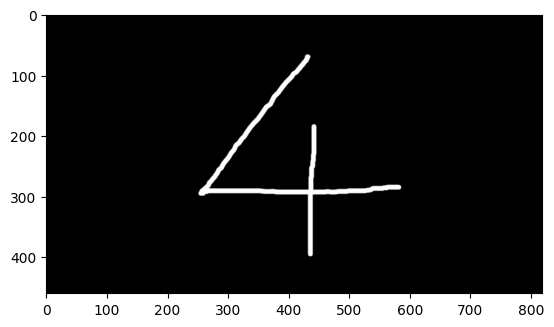

In [48]:
image = plt.imread("/content/number4.webp")
plt.imshow(image)

In [49]:
image.shape

(460, 819, 3)